# Importing the libraries

In [1]:
pip install --upgrade torch torchvision

     |████████████████████████████████| 881.9 MB 1.3 kB/s             
     |████████████████████████████████| 23.2 MB 777 kB/s             
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1+cpu
    Uninstalling torch-1.9.1+cpu:
      Successfully uninstalled torch-1.9.1+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1+cpu
    Uninstalling torchvision-0.10.1+cpu:
      Successfully uninstalled torchvision-0.10.1+cpu
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.1 requires torch==1.9.1, but you have torch 1.10.2 which is incompatible.
torchaudio 0.9.1 requires torch==1.9.1, but you have torch 1.10.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# PyTorch libraries
import torch
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F

# Plot libraries
import matplotlib.pyplot as plt

# Function definitions

In [3]:
# Function to display an image
def show_image(image):
    # Convert image
    image = F.to_pil_image(image)
    
    # Show image
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

In [4]:
# Function to draw a bounding box on an image based on some parameters
def draw_bounding_box(image_path, results_df, color = 'red', thickness = 4): 
    # Read image
    image = read_image(image_path)
    
    # Display image with bounding boxes
    image = draw_bounding_boxes(image, torch.tensor(results_df[['xmin', 'ymin', 'xmax', 'ymax']].values), 
                                colors = color, width = thickness, labels = results_df['name'].to_list())
    show_image(image)

# Copy files to output folder so predictions can go 100% offline

In [5]:
# YOLOv5 source folder
!cp -r ../input/great-barrier-reef-training-a-baseline-yolov5/yolov5 ./yolov5

# Baseline weights
!cp ../input/great-barrier-reef-training-a-baseline-yolov5/yolov5/runs/train/exp/weights/best.pt ./baseline.pt

# Font required by the model
!cp ../input/yolov5-font/Arial.ttf ./Arial.ttf

# Load and show sample images

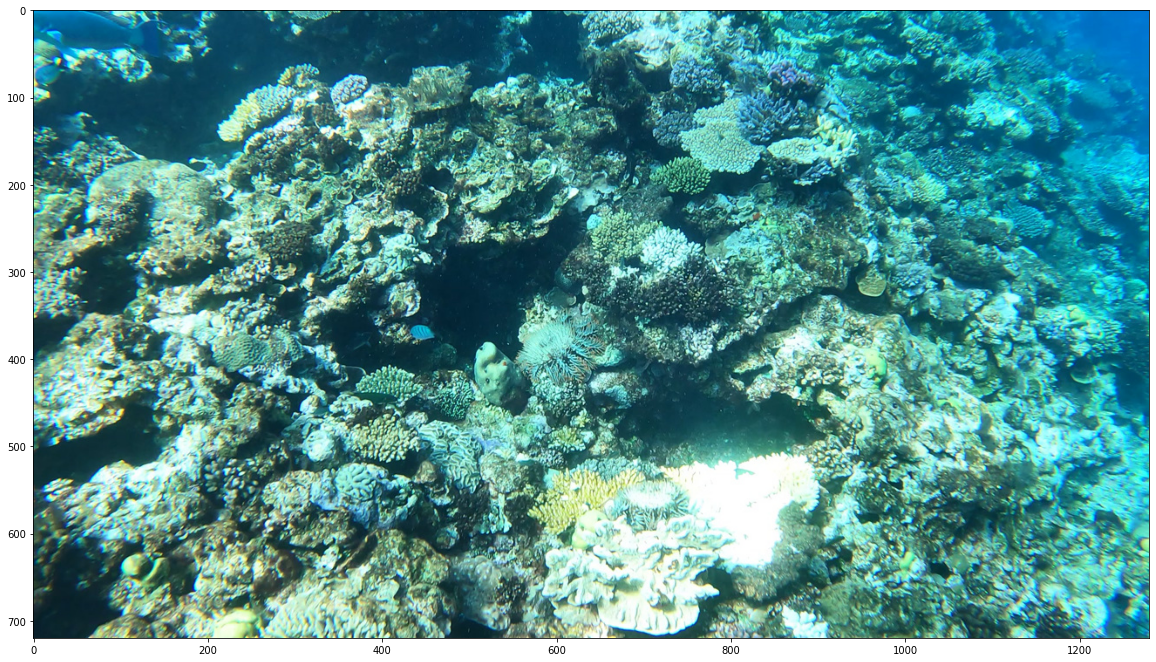

In [6]:
# Load a train and a validation image
train_img_path = '../input/great-barrier-reef-training-a-baseline-yolov5/datasets/train/0-56.jpg'
validation_img_path = '../input/great-barrier-reef-training-a-baseline-yolov5/datasets/validation/1-4137.jpg'

# Show train image
show_image(read_image(train_img_path))

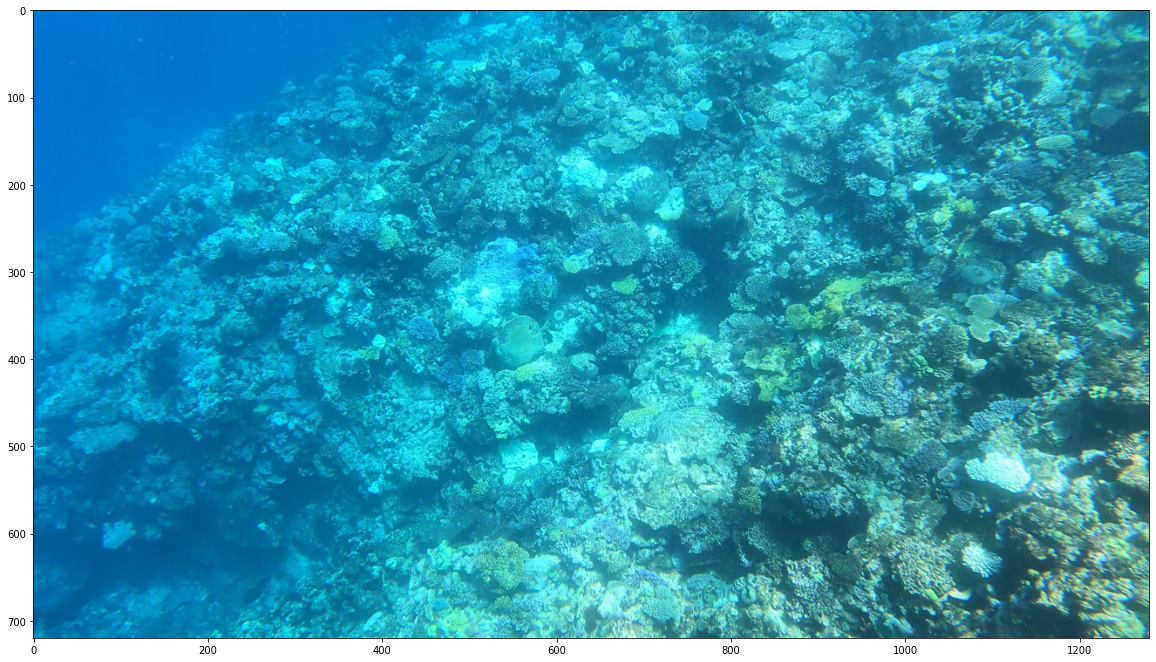

In [7]:
# Show validation image
show_image(read_image(validation_img_path))

# Load and run the baseline model on those images

In [8]:
# Loading the baseline model
model_path = './baseline.pt'
model = torch.hub.load('./yolov5', 'custom', path = model_path, source = 'local')

# Prepare a test array
imgs = [train_img_path, validation_img_path]

# Inference
results = model(imgs)

# Print results
results.print()

requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...

requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 2 packages updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.0-216-g856d4e5 torch 1.10.2+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 
/opt/conda/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/2: 720x1280 2 starfishs
image 2/2: 720x1280 1 starfish
Speed: 39.7ms pre-process, 56.4ms inference, 1.1ms NMS per image at shape (2, 3, 384, 640)


# Show the results

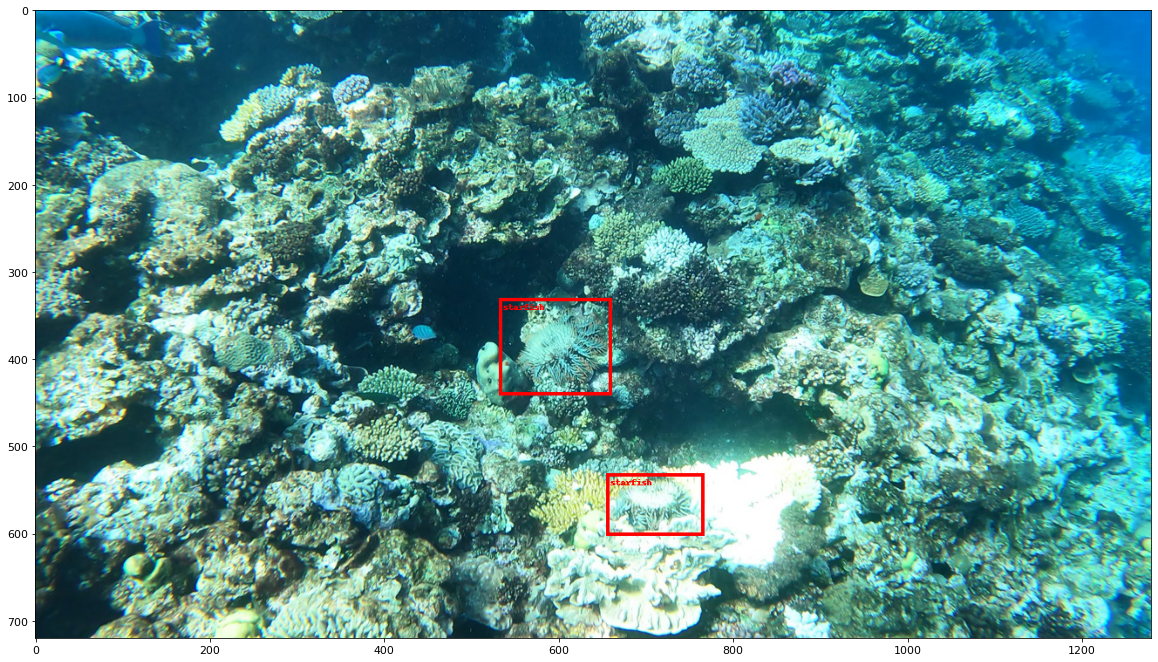

In [9]:
# Show train image with bounding boxes
draw_bounding_box(train_img_path, results.pandas().xyxy[0])

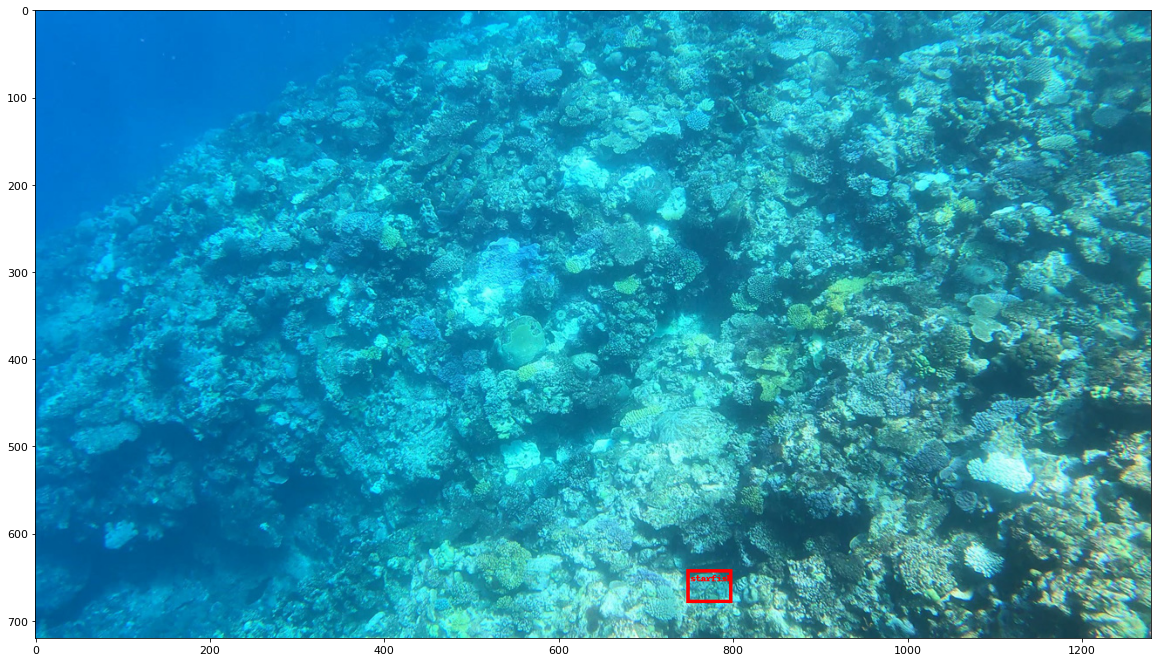

In [10]:
# Show validation image with bounding boxes
draw_bounding_box(validation_img_path, results.pandas().xyxy[1])